In [2]:
%matplotlib inline
%load_ext rmagic
# %load_ext rpy2.ipython
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit

from IPython.display import display
from IPython.display import HTML

print 'import finished'

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
import finished


# Week1 Homework

### Exercise 1

In [3]:
myopia = pd.read_csv('./data/MYOPIA-fixed.csv')
display(myopia.head(5))
# print 'myopic 0', len(table[table['MYOPIC'] == 0])
# print 'myopic 1', len(table[table['MYOPIC'] == 1])
# print table.columns
# print table[['MYOPIC', 'SPHEQ']]

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


#### Exercise 1a
- replace x with SPHEQ
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$

- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$

- the values of outcome variable (MYOPIC) are binary which is discrete and not continuous, thus logistic model is more suitable than linear regression model.

#### Exercise 1b

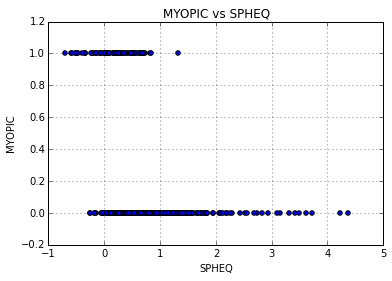

In [4]:
sub = plt.subplot()
sub.scatter(x=myopia['SPHEQ'], y=myopia['MYOPIC'])
sub.set_xlabel('SPHEQ')
sub.set_ylabel('MYOPIC')
sub.set_title('MYOPIC vs SPHEQ')
sub.grid(True)
plt.show()

#### Exercise 1c
likelihood / log-likelihood function, n=618, (y=1 for 81, y=0 for 537)

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### Exercise 1d
- **logit estimation**: $\pi(x) = \frac{e^{0.054 - 3.8331x}} {1 + e^{0.054 - 3.8331x}}$
- **logit estimation log**: $lg(\pi(x)) = 0.054\beta_0 - 3.8331\beta_1x$

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


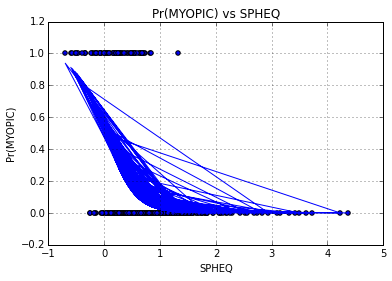

In [5]:
lg = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia)
result = lg.fit()
# print result.summary()
intercept, SPHEQ = result.params['Intercept'], result.params['SPHEQ']

numerator = np.exp(intercept + SPHEQ * myopia.SPHEQ)
sub = plt.subplot()
sub.plot(myopia.SPHEQ, numerator / (1 + numerator))
sub.scatter(x=myopia['SPHEQ'], y=myopia['MYOPIC'])
sub.set_xlabel('SPHEQ')
sub.set_ylabel('Pr(MYOPIC)')
sub.set_title('Pr(MYOPIC) vs SPHEQ')
sub.grid(True)
plt.show()

### Exercise 2

In [6]:
icu = pd.read_csv('./data/icu.csv')
icu.head()
print len(icu[icu.STA == 1])
print len(icu[icu.STA == 0])

40
160


#### Exercise 2a
- x -> AGE
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$

- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$

- the values of outcome variable (STA) are binary which is discrete and not continuous, thus logistic model is more suitable than linear regression model.

#### Exercise 2b

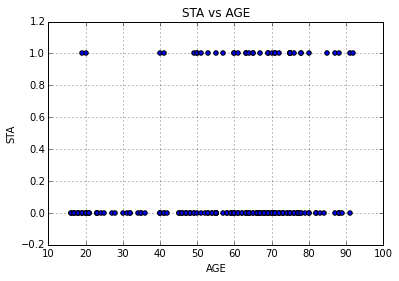

In [7]:
sub = plt.subplot()
sub.scatter(x=icu.AGE, y=icu.STA)
sub.set_xlabel('AGE')
sub.set_ylabel('STA')
sub.set_title('STA vs AGE')
sub.grid(True)
plt.show()

#### Exercise 2c
likelihood / log-likelihood function, n=160, (y=1 for 40, y=0 for 120)

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### Exercise 2d
- **logit estimation**: $\pi(x) = \frac{e^{-3.0585 + 0.0275x}} {1 + e^{-3.0585 + 0.0275x}}$
- **logit estimation log**: $lg(\pi(x)) = -3.0585\beta_0 + 0.0275\beta_1x$

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        22:24:07   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.

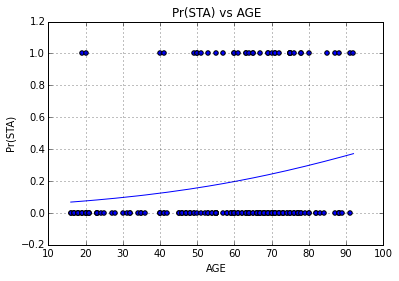

In [11]:
iculg = logit(formula = 'STA ~ AGE', data=icu)
result = iculg.fit()
print result.summary()
intercept, AGE = result.params['Intercept'], result.params['AGE']

numerator = np.exp(intercept + AGE * icu.AGE)
sub = plt.subplot()
sub.plot(icu.AGE, numerator / (1 + numerator))
sub.scatter(x=icu.AGE, y=icu.STA)
sub.set_xlabel('AGE')
sub.set_ylabel('Pr(STA)')
sub.set_title('Pr(STA) vs AGE')
sub.grid(True)
plt.show()

#### Exercise 2e
Summary: from the initial scatter plot, STA seemed only vaguely positively correated with AGE, but after logistic estimation, it was easy to notice that the probability of STA increased with AGE.

#Week2
the comparison of `observed` to `predicted` values using the likelihood function 
- **likelihood ratio** : $[\frac{model\>likelihood} {saturated\>model\>likelihood}]$

- **likelihood ratio test** : $ -2ln\, [ likelihood\>ratio ] $

to assess the significance of an independent variable, compare the value D with/without the independent variable.
- ** G = D(model without variable) - D(model with the variable) ** = $-2ln\,[\frac{likelihood\>without\>variable} {likelihood\> with\>variable}]$

- Under $H_0 : \beta_1 = 0$, the statistics G ~ $\chi^2(1)$ (distributed with $\chi^2$ degree of freedom 1)

- Wald Test(W) = $\frac{ \hat{\beta_1} }  { \widehat{SE}(\hat{\beta_1}) }$, and under $H_0 : \beta_1 = 0$, W ~ $N(0,1)$

- prefer Likelihood ratio test to Wald Test.

### Exercise 1

In [12]:
myopia2 = pd.read_csv('./data/MYOPIA-fixed.csv') # re-read the table
lg2 = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia2)
mresult2 = lg2.fit()
mresult2.summary()

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.2973
Time:                        22:24:17   Log-Likelihood:                -168.67
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 6.727e-33
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0540      0.207      0.261      0.794        -0.351     0.459
SPHEQ         -3.8331      0.418     -9.162      0.000        -4.653    -3.013
==============================================================================
"""

Using the results of the output from Stata, assess the significance of the slope coefficient for SPHEQ using the likelihood ratio test and the Wald test. What assumptions are needed for the p-values computed for each of these tests to be valid? Are the results of these tests consistent with one another? What is the value of the deviance for the fitted model?

Test: $H_0 : \beta_1 = 0$, $H_a: \beta_1 \neq 0$

- Likelihood ratio test assumption: result G is distributed as $\chi^2$ with df=1
- Likelihood ratio test(G) = 142.7331 with 1 df(p-value) < 0.001
    1. G = -2 * (-240.04) + 2 * (-168.67) = 142.7331
- Wald test assumption: W is distributed as N(0,1)
- Wald test = -9.162 with p-value < 0.001
- Both test results indicates that SPHEQ is a significant variable in predicting MYOPIA.

In [311]:
print result2.llf, result2.llnull, result2.llr, result2.llr_pvalue
print -3.8331 / 0.418

-168.672439854 -240.038508429 142.732137151 6.72664045685e-33
-9.17009569378


### Exercise 2

In [8]:
icu = pd.read_csv('./data/icu.csv')
iculg2 = logit(formula = 'STA ~ AGE', data=icu)
icuresult = iculg2.fit()
icuresult.summary()

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        01:32:44   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.011      2.607      0.009         0.007     0.048
==============================================================================
"""

Using the results of the output from the logistic regression package used for problem 2 part (d) of week 1, assess the significance of the slope coefficient for AGE using the likelihood ratio test and the Wald test. What assumptions are needed for the p-values computed for each of these tests to be valid? Are the results of these tests consistent with one another? What is the value of the deviance for the fitted model?

Test: $H_0 : \beta_1 = 0$, $H_a: \beta_1 \neq 0$
- Likelihood ratio test assumption: statistic G is distributed as $\chi^2$ with df=1
- Likelihood ratio test(G) = 7.8546 with 1 df(p-value) < 0.05
    1. G = -2 * (-100.08) + 2 * (-96.153) = 7.8546
- Wald test assumption: W is distributed as N(0,1)
- Wald test = -2.607 with p-value < 0.05
- Both test results indicates that AGE is a significant variable in predicting STA. Thus reject $H_0$

In [14]:
# print icuresult.llf, icuresult.llnull, icuresult.llr, icuresult.llr_pvalue
print 'log likelihood with variable: %s' % icuresult.llf
print 'log likelihood without variable: %s' % icuresult.llnull
print 'log likelihood ratio(Deviance): %s' % icuresult.llr
print 'log likelihood ratio p-value: %s' %icuresult.llr_pvalue
print -2*icuresult.llf +2*icuresult.llnull

log likelihood with variable: -96.1531901919
log likelihood without variable: -100.080484708
log likelihood ratio(Deviance): 7.85458903155
log likelihood ratio p-value: 0.00506918737428
-7.85458903155
